### Transport equation on circles
Our goal is to compute and visualize solutions of the advection or transport equation $u_t+cu_x=0$ on the interval $[0,L]$ with periodic boundary conditions $u(0,t)=u(L,t)$ and $u_x(0,t)=u_x(L,t)$, which effectively places this equation on a circle of circumference $L$. First, we load the necessary Python modules.

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

Next, we define the following functions:
* `lax_wendroff` and `update_solution` use the Lax-Wendroff method to update the solution to the next time step;
* `update_graph` animates the solution.

In [2]:
def lax_wendroff(u, cfl):
    u += - cfl/2*(np.roll(u,-1) - np.roll(u,+1)) + cfl**2/2*(np.roll(u,-1) - 2*u + np.roll(u,+1))
    return u

def update_solution(f, v, cfl, Nframes, Nskip):
    n = 0
    u = f
    v[0, :] = f
    while n<Nframes:
        n += 1
        for k in range(Nskip):
            u = lax_wendroff(u, cfl)
        v[n, :] = u
        yield u

def update_graph(u, x, line1):
    line1.set_data(x, u)

In the next cell, we define the wave speed function $c$, set the initial condition, and run the animation of the solution.

<IPython.core.display.Javascript object>


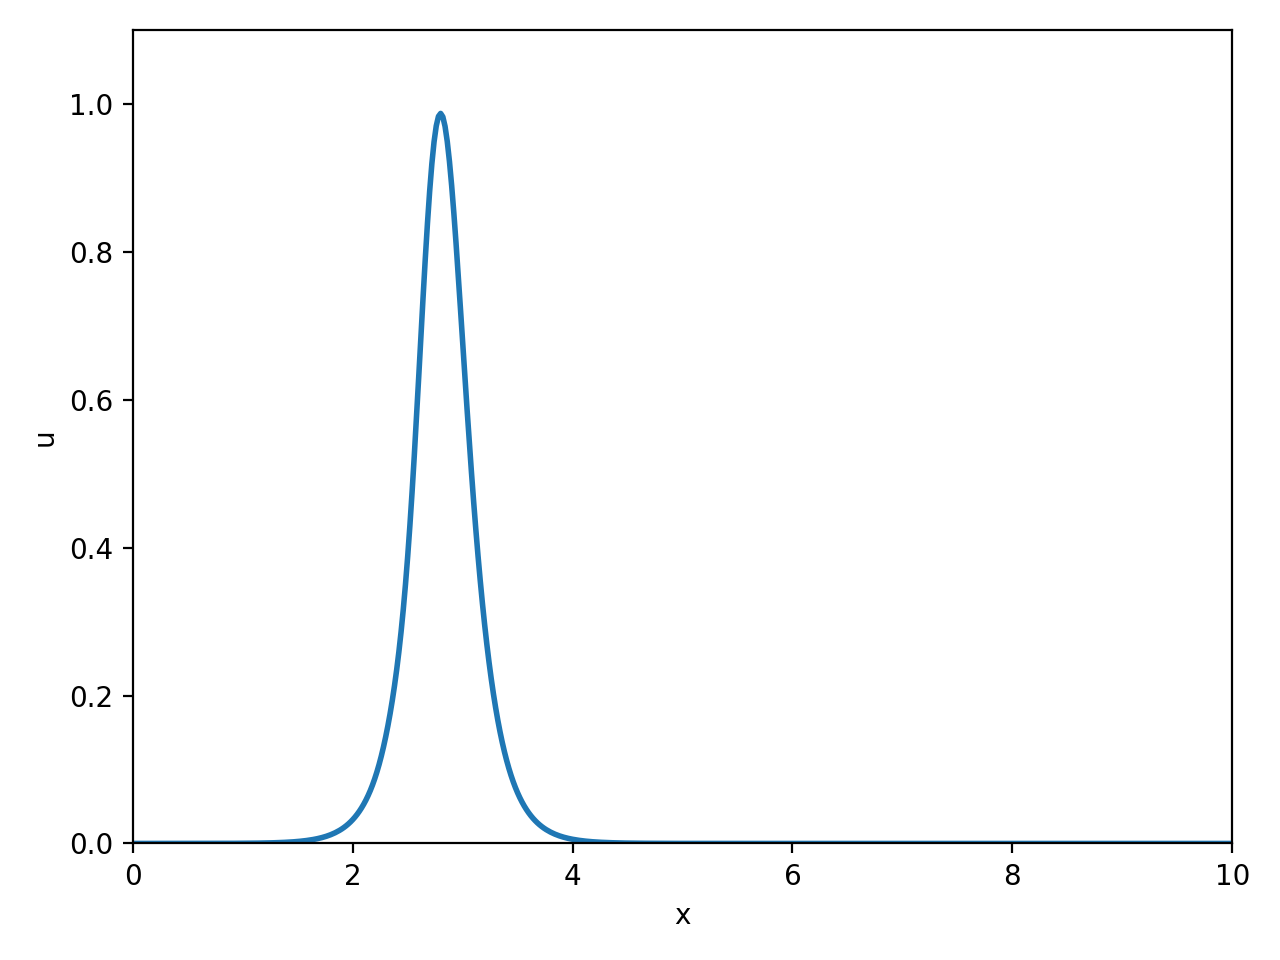

In [3]:
# model parameter
c = 1        # wave speed
L = 10       # domain length 

# numerical parameters
N = 500          # grid size

# set initial condition
x = np.linspace(0, L, N, endpoint=False)
f = 1/np.cosh((x-L/2)*5)

# animation parameters
Nsteps = 1000
Nskip = 10

# set time step to satisfy stability criterion (cfl<1)
cfl = 0.9
dx = L/N
dt = cfl * dx / c

# compute and animate solution
Nframes = int(Nsteps/Nskip)
v = np.zeros((Nframes, N))

fig = plt.figure()
ax  = plt.axes(xlim=(0,L), ylim=(np.min(np.min(f)*1.1,0), np.max(np.max(f)*1.1,0)))
line1, = ax.plot([], [], linewidth=2, color = "tab:blue")
ax.set_xlabel('x')
ax.set_ylabel('u')
ani = animation.FuncAnimation(fig, update_graph,
                              update_solution(f, v, cfl, Nframes, Nskip),
                              fargs=(x, line1), interval=25, blit=False, repeat=False)
plt.tight_layout()
plt.show()

Finally, we visualize the solution in a space-time contour plot.

<IPython.core.display.Javascript object>


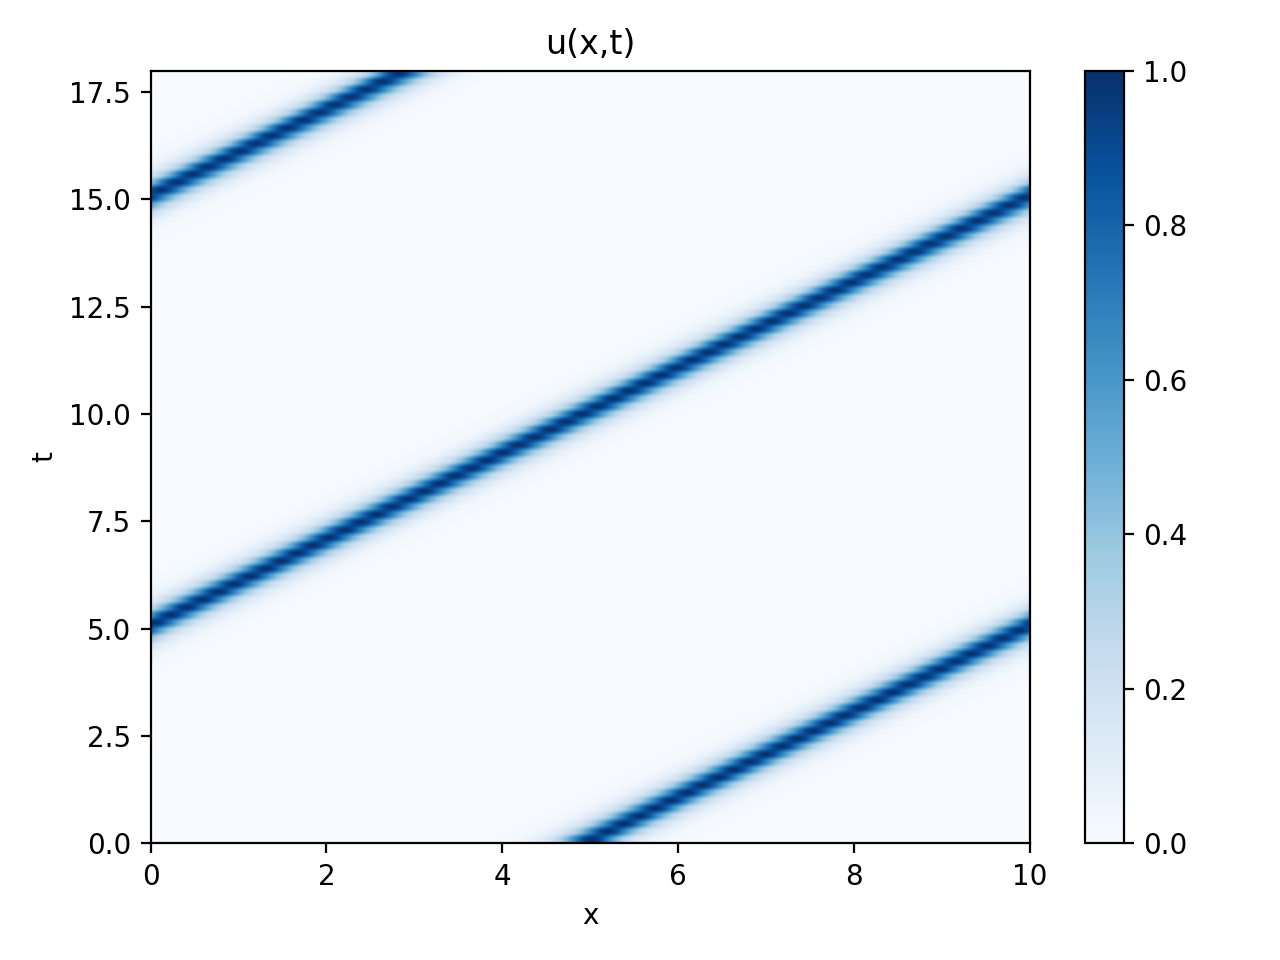

In [4]:
fig = plt.figure()
extent = [0, L, 0, Nsteps*dt]
plt.imshow(v, cmap='Blues', extent=extent, aspect='auto', origin='lower')
plt.title('u(x,t)')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.tight_layout()
plt.show()